In [25]:
import sys
import json
import importlib  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append("../")
sys.path.append("../LOCOinPython/")

In [3]:
from utils import ring_to_madx

In [4]:
from LOCOinPython.file_loader.structure_loader import read_structure
ut = importlib.import_module("SKIF-Lattice-Analysis.utils")

# Converter

In [5]:
# seq = ring_to_madx("D:/Work/K500/Regime+e-/RING/PODEMAXR.rin")

# Structure loading

In [6]:
file = "structures/k500.seq"
structure = read_structure(file, energy=0.43)

Structure in the JSON format already exists


# Ideal structure

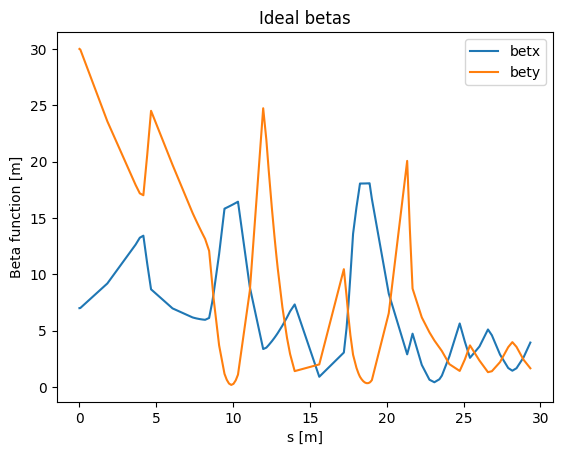

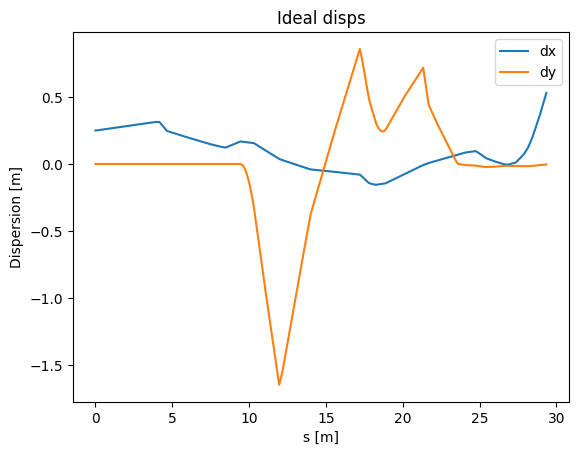

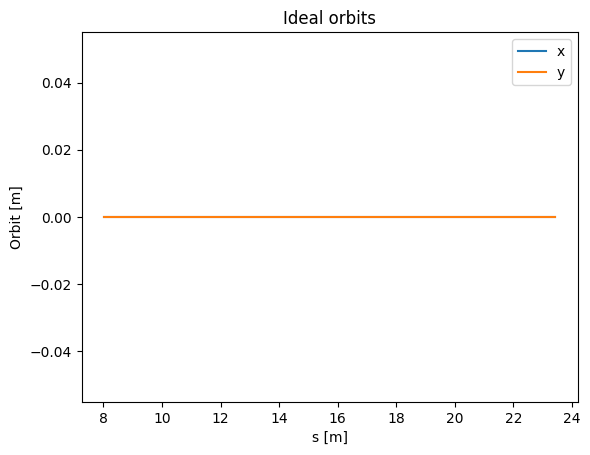

In [7]:
init_optics = ut.get_optics(structure, initial_twiss={"betx": 7, "bety": 30, "dx": 0.25})
ut.plot_optics(init_optics, params_to_show="beta_all", title="Ideal betas")
plt.show()

ut.plot_optics(init_optics, params_to_show="disp_all", title="Ideal disps")
plt.show()

ut.plot_optics(init_optics, params_to_show="orbit", title="Ideal orbits")
plt.show()

In [144]:
# kicks of correctors in a model
corr_kicks = {"KZ13": -0.0001, "KX14": 0.001, "KM5": 0.001, "KL25X": 0.001, "KZ15": 0.001, "KM6": -0.001, "KX16": -0.001}
HR = 1701.2
for corr, val in corr_kicks.items():
    print(corr, '{:.10f}'.format(val / HR * length[corr] * 1e2))

KZ13 -0.0000017164
KX14 0.0000171644
KM5 0.0000516165
KL25X 0.0000117564
KZ15 0.0000070538
KM6 -0.0000366800
KX16 -0.0000070538


In [ ]:
# km6z polarity incorrect

In [115]:
# Corrs
dH_dI = {"KL25X": 2.72e-4, "KM5": 61.2e-4, "KM6": 61.2e-4, "KZ15": 3.77e-4, "KZ13": 203.2e-4, "KX16": 3.77e-4, "KX14": 203.2e-4}
length = {"KL25X": 0.2, "KM5": 0.8781, "KM6": 0.624, "KZ15": 0.12, "KZ13": 0.292, "KX16": 0.12, "KX14": 0.292}
names = {"KL25X": "el.5kl25x", "KM5": "el.k5m5z", "KM6": "el.k5m6z", "KZ15": "el.k5z15", "KZ13": "el.5kz13", "KX16": "el.k5x16", "KX14": "el.5kx14"}
energy = 0.43
step = {"KL25X": 1.03, "KM5": 0.04, "KM6": 0.06, "KZ15": 1.8, "KZ13": -0.02, "KX16": 2.05, "KX14": -0.08}
hkickers = ['el.5kx14', 'el.5kl25x', 'el.k5x16']
vkickers = ['el.5kz13', 'el.k5m5z', 'el.k5z15', 'el.k5m6z']
# DT11 0 
kicker_before_bpm = {'el.5kx14': "DT11", 'el.5kl25x': "DT11", 'el.k5x16': "DT12", 'el.5kz13': "DT11", 'el.k5m5z': "DT11", 'el.k5z15': "DT11", 'el.k5m6z': "DT13"}

In [139]:
with open("D://PycharmProjects//K500-Beamline//log//pictures//2024_02_14//responses.json", 'r') as f:
    resp_mat = json.load(f)

In [141]:
resps = {"hkicker": {}, "vkicker": {}}
for corr in hkickers:
    corr_init = list(names)[list(names.values()).index(corr)]  
    coeff = dH_dI[corr_init] * step[corr_init] * length[corr_init] * 0.3 / energy * 1000
    print(corr, coeff)
    resps["hkicker"][corr] = np.array(resp_mat[corr_init]["resp_x"][:-1] + resp_mat[corr_init]["resp_y"][:-1]) / coeff
    if corr == 'el.k5x16':
        resps["hkicker"][corr][0] = 0
        resps["hkicker"][corr][3] = 0
    resps["hkicker"][corr] = list(resps["hkicker"][corr])

for corr in vkickers:
    corr_init = list(names)[list(names.values()).index(corr)]
    coeff = dH_dI[corr_init] * step[corr_init] * length[corr_init] * 0.3 / energy * 1000
    print(corr, coeff)
    resps["vkicker"][corr] = np.array(resp_mat[corr_init]["resp_x"][:-1] + resp_mat[corr_init]["resp_y"][:-1]) / coeff
    if corr == 'el.k5m6z':
        resps["vkicker"][corr][0:2] = 0
        resps["vkicker"][corr][3:5] = 0
    resps["vkicker"][corr] = list(resps["vkicker"][corr])
resps

el.5kx14 -0.33116874418604647
el.5kl25x 0.03909209302325581
el.k5x16 0.06470372093023254
el.5kz13 -0.08279218604651162
el.k5m5z 0.14997131162790697
el.k5z15 0.05681302325581396
el.k5m6z 0.15986009302325577


{'hkicker': {'el.5kx14': [0.3541273374012823,
   -1.3775266146122995,
   -0.049614175102434425,
   -0.06328921266249507,
   -0.13663146703005669,
   0.19193338342873997],
  'el.5kl25x': [0.15100411371663106,
   9.192711481155968,
   -4.247735160560103,
   0.7620207026270004,
   0.8919475850737469,
   -0.12388635027022243],
  'el.k5x16': [0.0,
   0.15826825301909223,
   2.30039571887342,
   0.0,
   -0.9854761856101152,
   -0.7525743735127952]},
 'vkicker': {'el.5kz13': [0.9554537621107264,
   -0.6050927186945486,
   -2.998398514958854,
   6.936661890428314,
   -1.4669789944801035,
   4.429756773291942],
  'el.k5m5z': [0.45079672605325394,
   0.3937114997764522,
   -0.19772793265130917,
   1.4157705675108951,
   0.9053174148310901,
   1.8386214635491471],
  'el.k5z15': [6.191716237010171,
   2.6692416004952695,
   -5.861231109307243,
   -0.11908692752007886,
   -0.7628616660914634,
   2.2375814128502967],
  'el.k5m6z': [0.0,
   0.0,
   -0.013612026862701574,
   0.0,
   0.0,
   -3.6079842

In [93]:
# Lenses
dG_dI = 0.0283*1e3*1e-4/1e-2
length = 0.23
energy = 0.43
step = {'KL21': -1.715,
 'KL22': -1.7532,
 'KL23': -3.0096,
 'KL24': -2.812,
 'KL25': -2.0295,
 'KL26': 2.01544,
 'KL27': 2.4764,
 'KL28': -4.15065,
 'KL29': 4.30315,
 'KL30': 4.6449}
name_prefix = "el.5l"
k1l_steps = {key.replace("KL", name_prefix): val*length*dG_dI*0.3/energy for key, val in step.items()}
k1l_steps

{'el.5l21': -0.07788094186046511,
 'el.5l22': -0.07961566604651163,
 'el.5l23': -0.1366708353488372,
 'el.5l24': -0.1276974976744186,
 'el.5l25': -0.0921628988372093,
 'el.5l26': 0.09152441134883721,
 'el.5l27': 0.11245735534883719,
 'el.5l28': -0.188487773372093,
 'el.5l29': 0.19541304662790693,
 'el.5l30': 0.21093247046511623}

In [105]:
quad_data = {}
for quad_init, val in step.items():
    quad = quad_init.replace("KL", name_prefix)
    coeff = length*dG_dI
    quad_data[quad] = {      
        "type": "quadrupole",
        "associate_with": [quad],
        "coeff": coeff,
        "setcurrent": "None",
        "step": val,
        "checkcurrent": "None"}
quad_data

{'el.5l21': {'type': 'quadrupole',
  'associate_with': ['el.5l21'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': -1.715,
  'checkcurrent': 'None'},
 'el.5l22': {'type': 'quadrupole',
  'associate_with': ['el.5l22'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': -1.7532,
  'checkcurrent': 'None'},
 'el.5l23': {'type': 'quadrupole',
  'associate_with': ['el.5l23'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': -3.0096,
  'checkcurrent': 'None'},
 'el.5l24': {'type': 'quadrupole',
  'associate_with': ['el.5l24'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': -2.812,
  'checkcurrent': 'None'},
 'el.5l25': {'type': 'quadrupole',
  'associate_with': ['el.5l25'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': -2.0295,
  'checkcurrent': 'None'},
 'el.5l26': {'type': 'quadrupole',
  'associate_with': ['el.5l26'],
  'coeff': 0.06509,
  'setcurrent': 'None',
  'step': 2.01544,
  'checkcurrent': 'None'},
 'el.5l27': {'type': 'quadrupole',
  'associate_with':

In [82]:
with open("D://PycharmProjects//K500-Beamline//log//pictures//2024_02_14//responses.json", 'r') as f:
    quad_resp_mat = json.load(f)

In [89]:
resps = {}
for quad_init in step:
    quad = quad_init.replace("KL", name_prefix)
    coeff = 1000
    resps[quad] = np.array(quad_resp_mat[quad_init]["resp_x"][:-1] + quad_resp_mat[quad_init]["resp_y"][:-1]) / coeff
    if quad_init in ["KL26", "KL27", "KL28"]:
        resps[quad][0] = 0
        resps[quad][3] = 0
    elif quad_init in ["KL29", "KL30"]:
        resps[quad][0:2] = 0
        resps[quad][3:5] = 0
    resps[quad] = list(resps[quad])


In [90]:
resps

{'el.5l21': [0.00024481395880381296,
  0.0004871324300765991,
  -0.00019681628545125296,
  0.00020072491963704487,
  0.00027204012870788574,
  0.0001425791382789612],
 'el.5l22': [0.00025784937360069947,
  0.0005552164722572674,
  -0.0004250736128200181,
  0.00036957410248843024,
  0.0004397315328771416,
  0.0002019170441410758],
 'el.5l23': [0.0006335034933355122,
  0.0005601595176590815,
  -0.0006818554136488171,
  0.0007409017880757655,
  0.000840046763420105,
  0.0007850008068813218],
 'el.5l24': [0.0001975472013155617,
  0.00019824043909708665,
  -0.00035200694402058905,
  0.00030167303085327113,
  0.0006117697397867845,
  0.001071484661102295],
 'el.5l25': [-0.00021326007843017569,
  -6.969615954619202e-05,
  0.00019669979535616376,
  -8.592569644634551e-05,
  -0.00011038721524752137,
  -0.0005982419013977052],
 'el.5l26': [0.0,
  0.0004590426867658441,
  -2.1398193185979686e-05,
  0.0,
  -7.02935825694686e-05,
  -0.0004297621293501421],
 'el.5l27': [0.0,
  7.472991943359375e-06,

In [68]:
with open("D://PycharmProjects//LOCOinPython//experimental_data//k500//k500_ideal_mat.json", 'r') as f:
    ideal = json.load(f)

with open("D://PycharmProjects//LOCOinPython//experimental_data//k500//k500_expr_resp_mat.json", 'r') as f:
    real = json.load(f)

In [ ]:
plot_diff_responses

In [9]:
from epics import caget

In [15]:
print(caget("CHAN:DT11:I"))

cannot connect to CHAN:DT11:I
None


In [27]:
print(caget("CHAN:DT11:Xe-I"))
print(caget("CHAN:DT11:Ie-I"))
print(caget("CHAN:K500:Iu_skip-I"))
print(caget("CHAN:K500:ready-I"))
print(caget("CHAN:K500:posE_skip-I"))
print(caget("CHAN:K500:Xe_skip-I"))

0.0
0.0
[5.164127  4.6808314 2.4820726]
551006
[]
[]


In [32]:
print("TbT X", caget("VEPP3:4P5:Xext-I"))
print("TbT I", caget("VEPP3:4P5:Iext-I"))
print("TbT X Fast", caget("VEPP3:1P7:Xfast-I"))
print("CO X ?", caget("VEPP3:1P7:I-I"))
print("CO X ?", caget("VEPP3:1P7:Ilast-I"))
print("CO X ?", caget("VEPP3:1P7:SW0I-I"))
print("CO X ?", caget("VEPP3:1P7:SW1X-I"))
print("CO X ?", caget("VEPP3:1P7:SW2X-I"))
print("CO X ?", caget("VEPP3:1P7:SW3X-I"))

TbT X [0.13295753 0.13390425 0.14351287 ... 0.07775601 0.07521451 0.05325186]
TbT I [62.214207 62.208958 62.200287 ... 62.232944 62.124363 62.230312]
TbT X Fast []
CO X ? 37.97310256958008
CO X ? 37.973915100097656
CO X ? 37.969234466552734
CO X ? -0.49391311407089233
CO X ? -0.4094584584236145
CO X ? -0.550749659538269


In [34]:
print(caget("CHAN:DT10:Xu-I"))

cannot connect to CHAN:DT10:Xu-I
None


In [33]:
def plot_current(data, bpm, save: bool = False):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.plot(data[bpm]["i"], label=f"{bpm} Ток")
    ax1.set_xlabel("Индекс выстрела")
    ax1.set_ylabel("Ток [мА]")
    ax1.legend()
    ax2.set_xlim(ax1.get_xlim())
    
    num_ticks = int(len(data[bpm]["time"]) / num)
    labels = data[bpm]["time"][::num_ticks]
    ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
    ax2.set_xticks(ticks)
    ax2.set_xticklabels(labels, rotation=60)
    if save:
        plt.savefig(dir + f"{bpm}_current.png", bbox_inches='tight')
    plt.show()

In [34]:
def plot_orbit(data, bpm, save: bool = False):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.plot(data[bpm]["x"], "o-", label=f"{bpm} X")
    ax1.plot(data[bpm]["y"], "o-", label=f"{bpm} Y")
    ax1.set_xlabel("Индекс выстрела")
    ax1.set_ylabel("Координата [мм]")
    ax1.legend()
    ax1.grid(axis="x")
    ax2.set_xlim(ax1.get_xlim())
    
    num_ticks = int(len(data[bpm]["time"]) / num)
    labels = data[bpm]["time"][::num_ticks]
    ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
    ax2.set_xticks(ticks)
    ax2.set_xticklabels(labels, rotation=60)
    if save:
        plt.savefig(dir + f"{bpm}_coord.png", bbox_inches='tight')
    plt.show()

In [35]:
def plot_responses(data, bpm_list, elem, step, save: bool = False):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.plot(bpm_list, data["init_x"], "o-", label=f"initial X")
    ax1.plot(bpm_list, data["init_y"], "o-", label=f"initial Y")
    ax1.plot(bpm_list, data["final_x"], "x-.", label=f"final X")
    ax1.plot(bpm_list, data["final_y"], "x-.", label=f"final Y")
    ax1.plot(bpm_list, data["resp_x"], "s--", label=f"diff X")
    ax1.plot(bpm_list, data["resp_y"], "s--", label=f"diff Y")
    ax1.set_xlabel("Монитор")
    ax1.set_ylabel("Координата [мм]")
    ax1.legend()
    plt.title(f"Element: {elem} Step: {step}")
    ax1.grid(axis="x")
    ax2.set_xlim(ax1.get_xlim())
    
    # num_ticks = int(len(data[bpm]["time"]) / num)
    # labels = data[bpm]["time"][::num_ticks]
    # ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
    # ax2.set_xticks(ticks)
    # ax2.set_xticklabels(labels, rotation=60)
    if save:
        plt.savefig(dir + f"{elem}_response.png", bbox_inches='tight')
    plt.show()

In [69]:
def plot_diff_responses(resp_mat_ideal, resp_mat_real, bpm_list, elem, type, units, save: bool = False):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.plot(bpm_list + bpm_list, resp_mat_ideal["responses"][type][elem], "o-", label="Model")
    ax1.plot(bpm_list + bpm_list, resp_mat_real["responses"][type][elem], "o-", label="Real")
    ax1.set_xlabel("Монитор X-Y")
    ax1.set_ylabel(f"Отклик [{units}]")
    ax1.legend()
    plt.title(f"Element: {elem}")
    ax1.grid(axis="x")
    ax2.set_xlim(ax1.get_xlim())
    
    # num_ticks = int(len(data[bpm]["time"]) / num)
    # labels = data[bpm]["time"][::num_ticks]
    # ticks = range(0, len(data[bpm]["time"]))[::num_ticks]
    # ax2.set_xticks(ticks)
    # ax2.set_xticklabels(labels, rotation=60)
    if save:
        plt.savefig(dir + f"{elem}_response.png", bbox_inches='tight')
    plt.show()

In [138]:
with open("D://PycharmProjects//K500-Beamline//log//2024_02_14_14_49_42_passing_l21_again.json", "r") as f:
    data = json.load(f)

# current_limit = 30
data["1P7"]["i"].insert(0, data["1P7"]["i"][0])
data["1P7"]["i"] = [data["1P7"]["i"][i+1] - data["1P7"]["i"][i] if (data["1P7"]["i"][i+1] - data["1P7"]["i"][i]) > 0 else 0 for i in range(len(data["1P7"]["i"])-1)]

In [37]:
folder = "2024_02_14"
dir = f"D://PycharmProjects//K500-Beamline//log//pictures//{folder}//"
num = 8

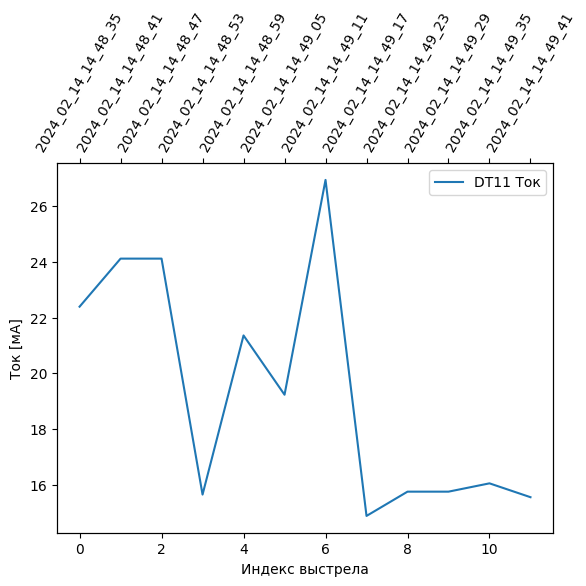

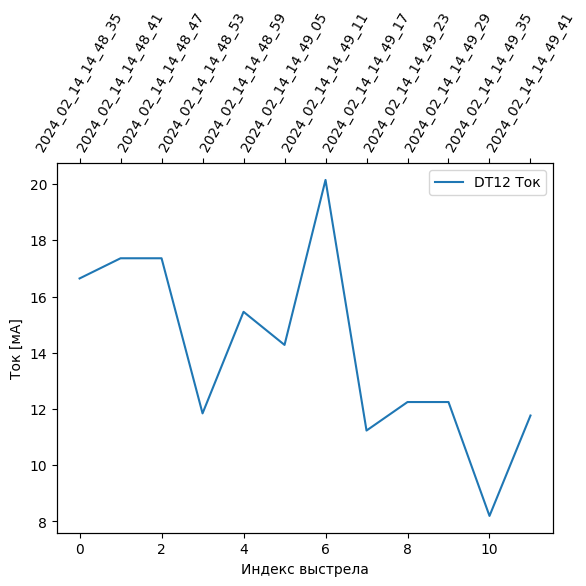

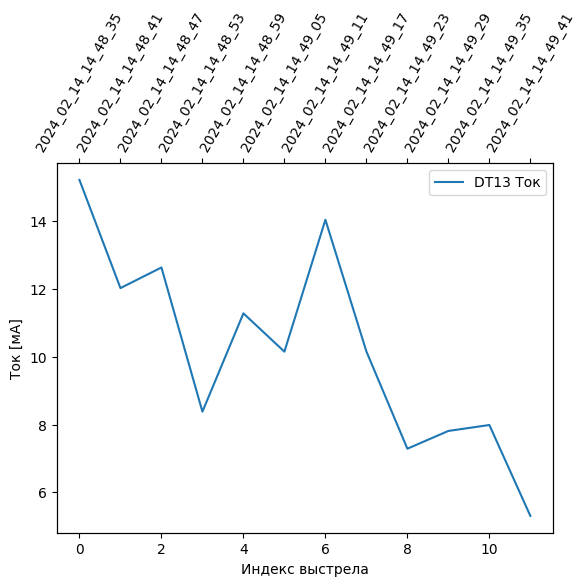

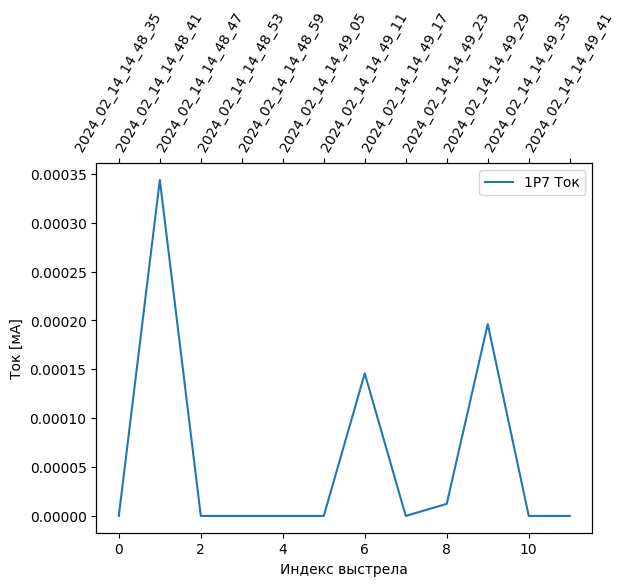

In [148]:
plot_current("DT11")
plot_current("DT12")
plot_current("DT13")
plot_current("1P7")

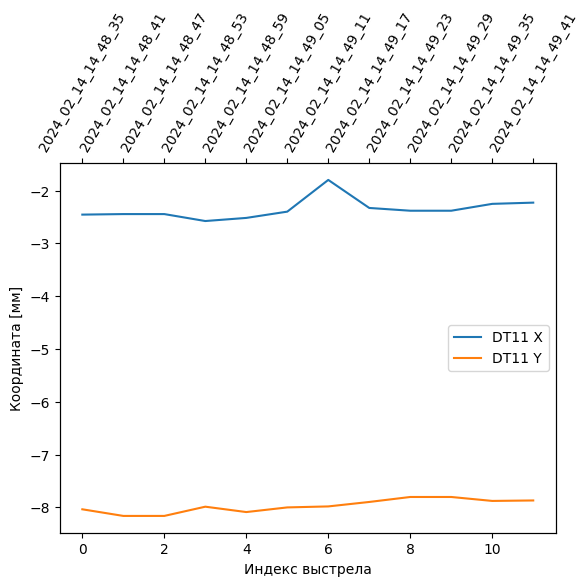

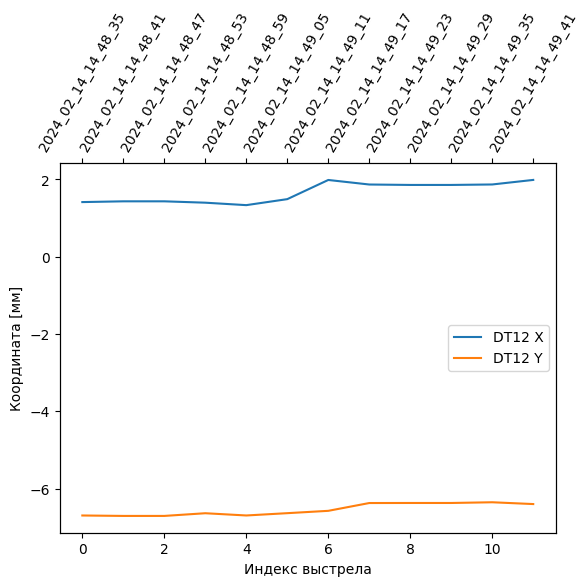

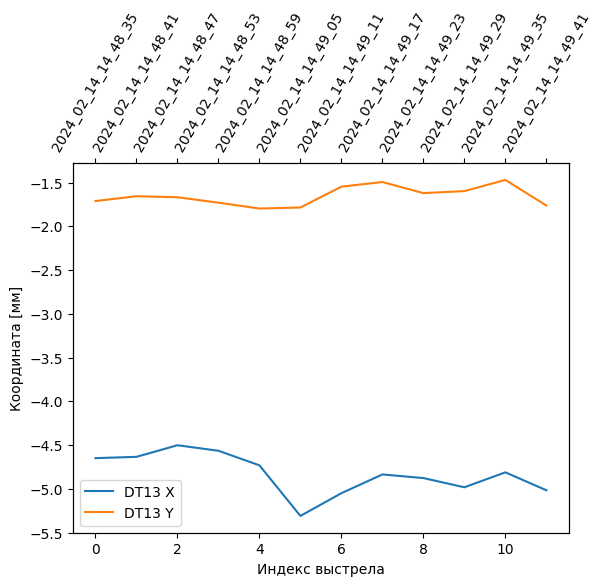

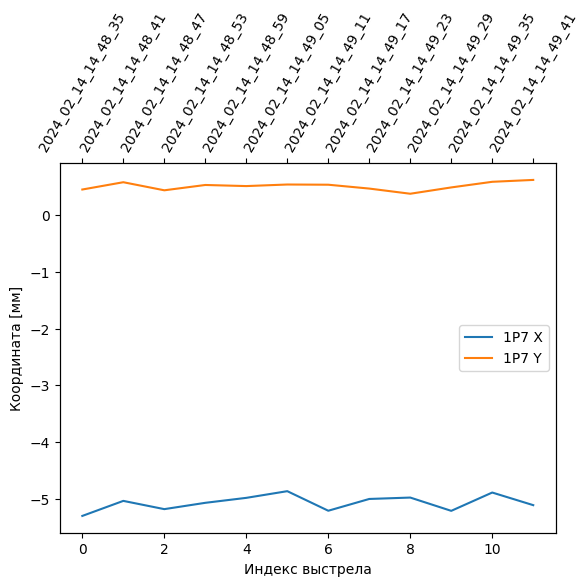

In [149]:
plot_orbit("DT11")
plot_orbit("DT12")
plot_orbit("DT13")
plot_orbit("1P7")

In [38]:
import glob
file_list = glob.glob("D://PycharmProjects//K500-Beamline//log//2024_02_14/*")

In [39]:
start = """KL21	6
KL22	11
KL23	9
KL24	10
KL25	13
KL26	10
KL27	7
KL28	10
KL29	16
KL30	14
KZ15	5
KX16	16
KL25X	9
KZ13	6
KX14	12
KM5	10
KM6	9
M5	11"""
step = """KL21	-4.9
KL22	-4.87
KL23	-7.92
KL24	-7.03
KL25	-4.95
KL26	4.88
KL27	6.04
KL28	-10.05
KL29	9.67
KL30	11.91
KZ15	5
KX16	5
KL25X	3.12
KZ13	0.621
KX14	-0.08
KM5	0.04
KM6	0.06
M5	0.4"""
start = start.split("\n")
start = dict([(i.split("\t")) for i in start])
step = step.split("\n")
step = dict([(i.split("\t")) for i in step])
skip = {"KX16": [12,13,14,15]}
start = {i: int(j) for i,j in start.items()}
step = {i: float(j) for i,j in step.items()}

In [40]:
from copy import deepcopy

KL26


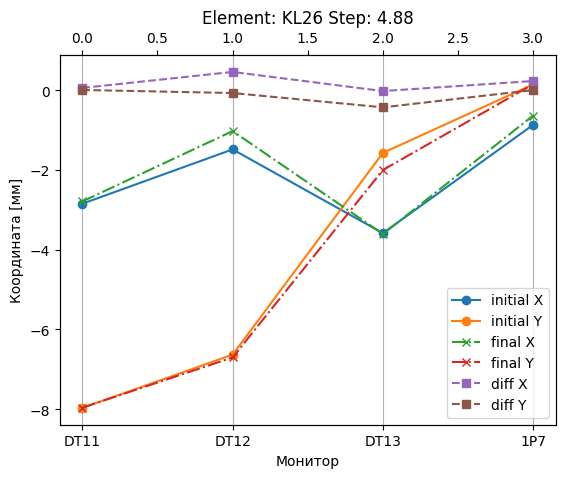

KL27


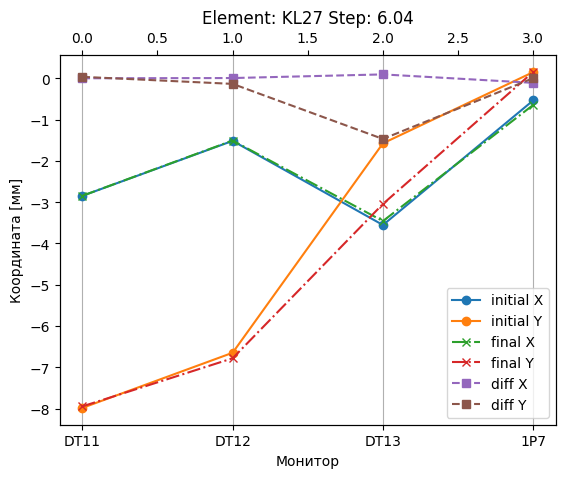

KL28


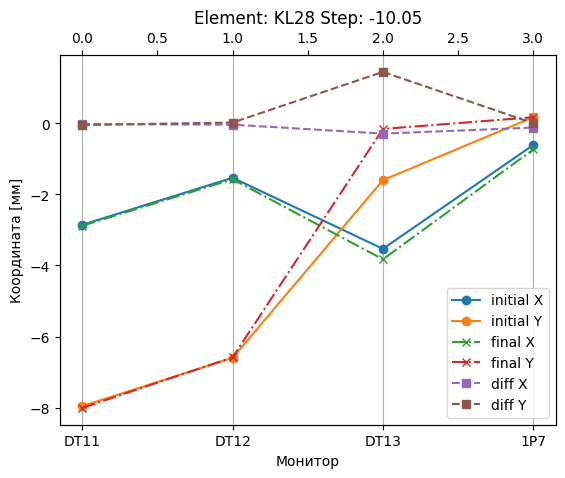

KL29


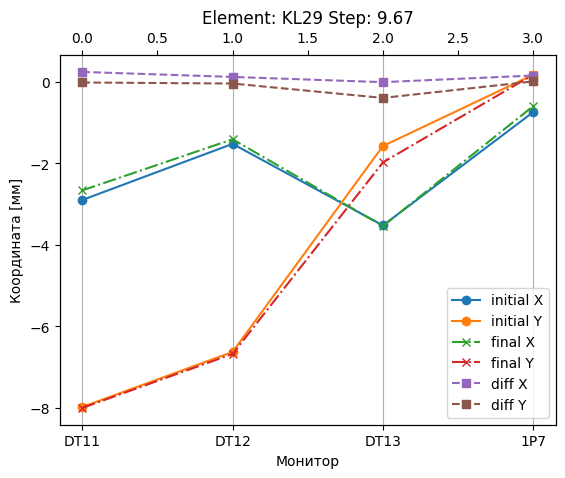

KL30


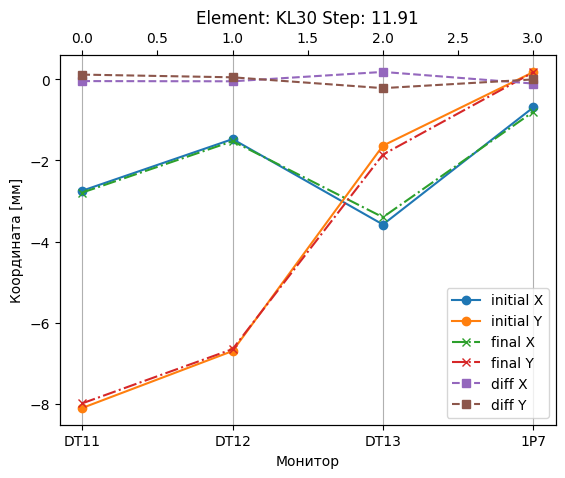

KZ15


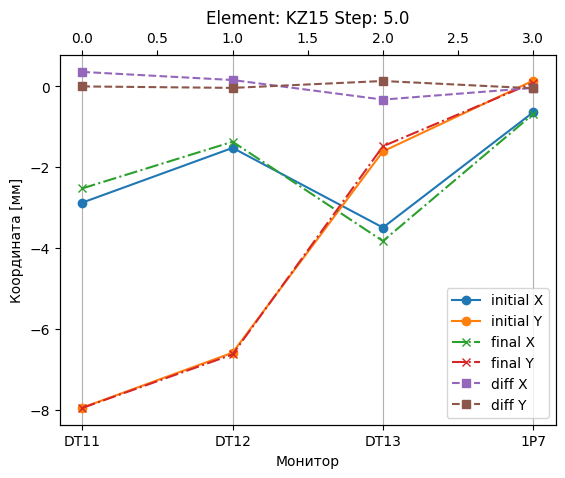

skipping turns
skipping turns
skipping turns
skipping turns
KX16


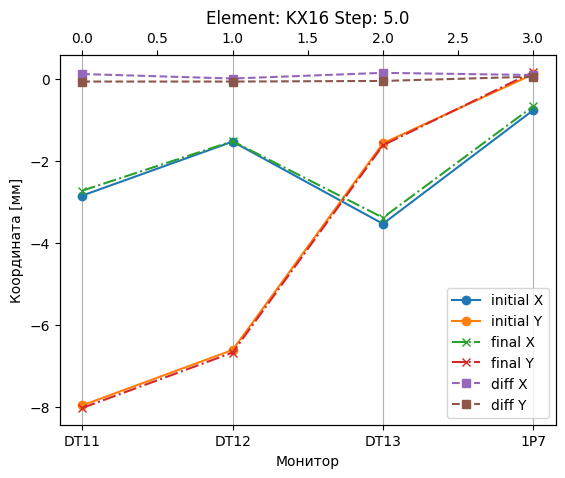

KZ13


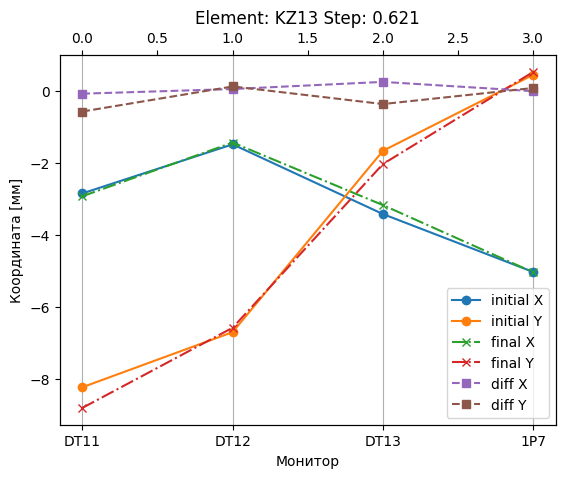

KX14


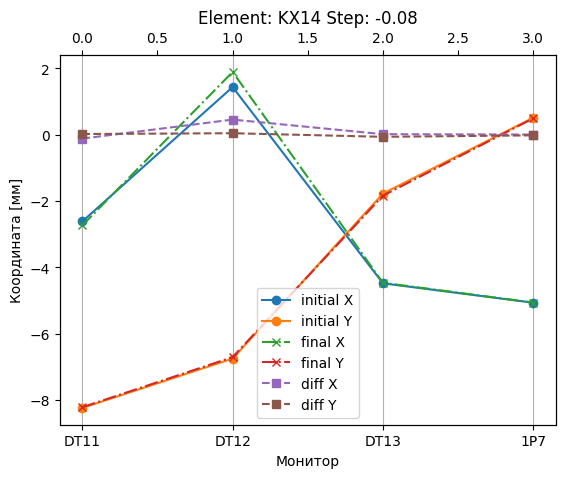

KM5


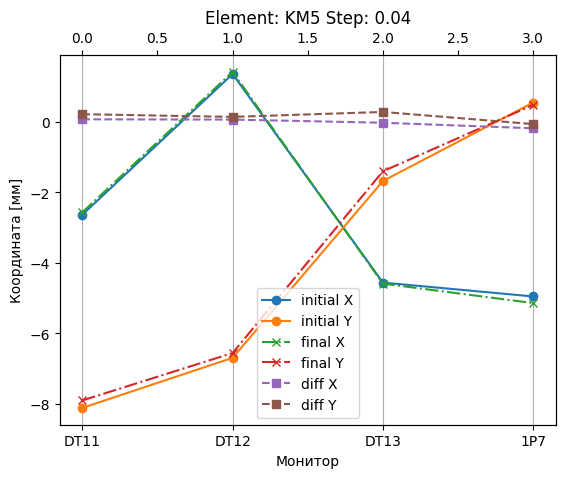

KM6


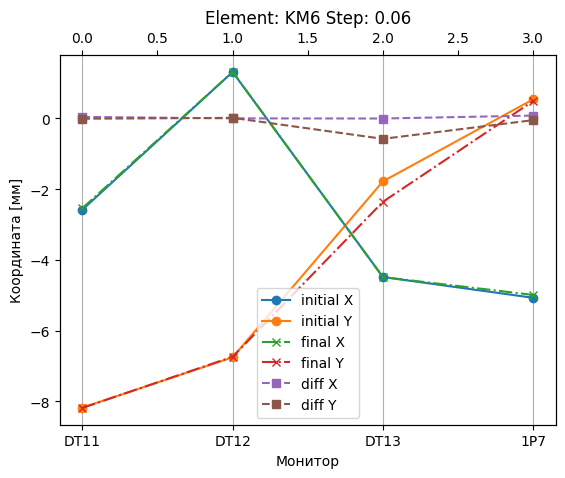

KL25X


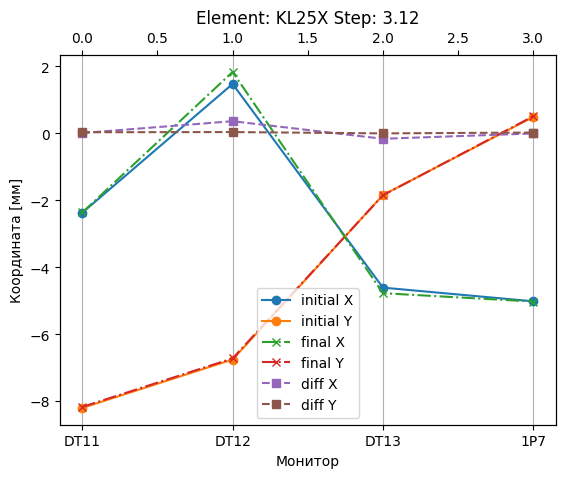

M5


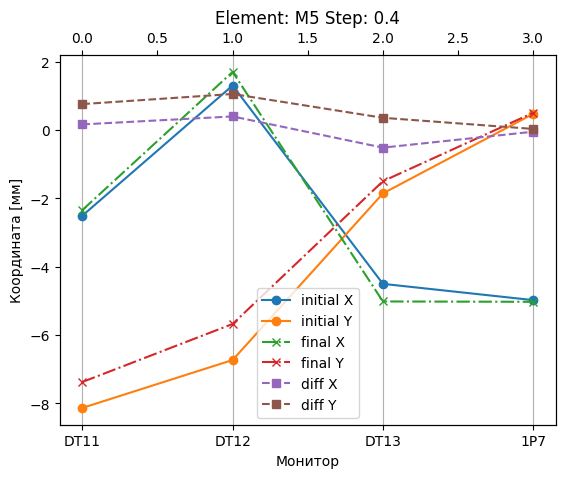

KL21


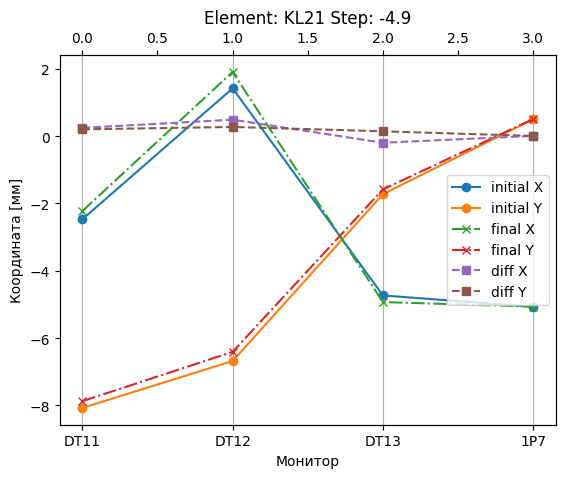

KL22


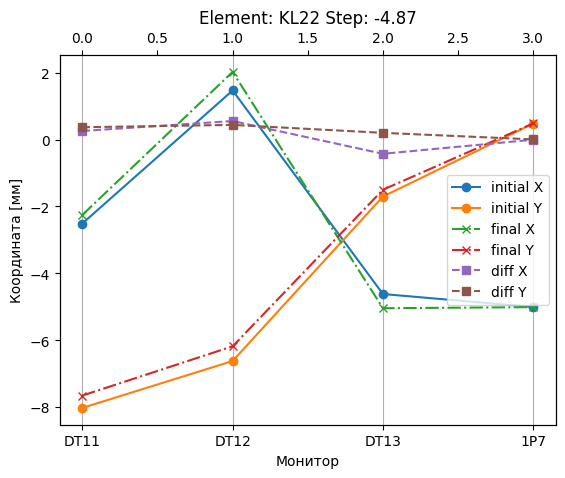

KL23


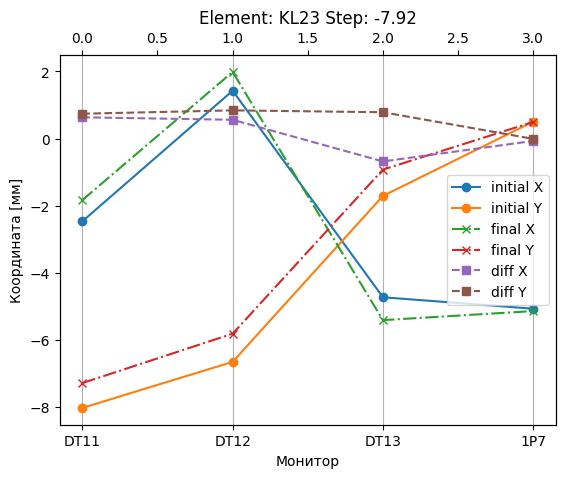

KL24


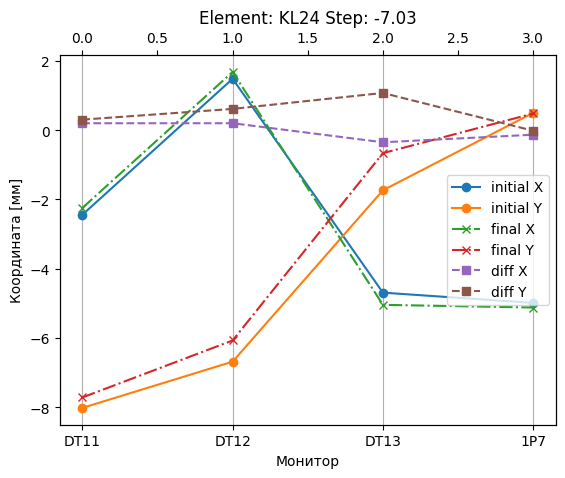

KL25


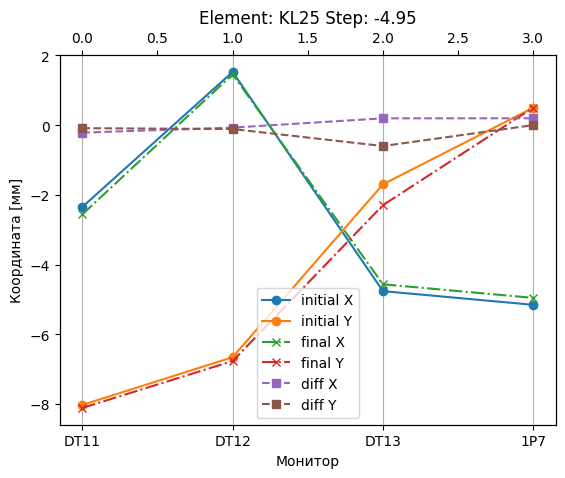

In [44]:
resps = {}
for file in file_list:
    with open(file, "r") as f:
        data = json.load(f)

    elem = file.split(".")[0].split("_")[-1].upper()
    if elem not in start:
        continue
    
    data["1P7"]["i"].insert(0, data["1P7"]["i"][0])
    data["1P7"]["i"] = [data["1P7"]["i"][i+1] - data["1P7"]["i"][i] if (data["1P7"]["i"][i+1] - data["1P7"]["i"][i]) > 0 else 0 for i in range(len(data["1P7"]["i"])-1)]
    init_orb_x = []
    init_orb_y = []
    final_orb_x = []
    final_orb_y = []
    for bpm in data:
        if elem in skip:
            print("skipping turns")
            x = deepcopy(data[bpm]["x"][:(start[elem])])
            y = deepcopy(data[bpm]["y"][:(start[elem])])
            for ind in skip[elem]:
                val = data[bpm]["x"][:(start[elem])][ind]
                x.remove(val)
                val = data[bpm]["y"][:(start[elem])][ind]
                y.remove(val)
            mean = np.mean(x)
            init_orb_x.append(mean)
            mean = np.mean(y)
            init_orb_y.append(mean)
            mean = np.mean(data[bpm]["x"][(start[elem]):])
            final_orb_x.append(mean)
            mean = np.mean(data[bpm]["y"][(start[elem]):])
            final_orb_y.append(mean)

        else:
            mean = np.mean(data[bpm]["x"][:(start[elem])])
            init_orb_x.append(mean)
            mean = np.mean(data[bpm]["y"][:(start[elem])])
            init_orb_y.append(mean)
            mean = np.mean(data[bpm]["x"][(start[elem]):])
            final_orb_x.append(mean)
            mean = np.mean(data[bpm]["y"][(start[elem]):])
            final_orb_y.append(mean)

    resps[elem] = {"init_x": init_orb_x,
                  "init_y": init_orb_y,
                  "final_x": final_orb_x,
                  "final_y": final_orb_y,
                  "resp_x": [i - j for i, j in zip(final_orb_x, init_orb_x)],
                  "resp_y": [i - j for i, j in zip(final_orb_y, init_orb_y)]}
    
    print(elem)
    bpm_list = list(data.keys())
    plot_responses(resps[elem], bpm_list, elem, step[elem], save=True)

# with open("D://PycharmProjects//K500-Beamline//log//pictures/2024_02_14//responses1.json", "w") as f:
#     json.dump(resps, f, indent=2)

In [45]:
import pandas as pd

In [46]:
a = {elem: pd.DataFrame(dat, index=["DT11", "DT12", "DT13", "1P7"]) for elem, dat in resps.items()}
b = pd.concat(list(a.values()), axis=1, keys=tuple(a.keys()))
b

KL26                                                        KL27   
        init_x    init_y   final_x   final_y    resp_x    resp_y    init_x   
DT11 -2.848242 -7.971116 -2.790887 -7.964532  0.057355  0.006584 -2.846973  \
DT12 -1.484910 -6.634255 -1.025867 -6.704548  0.459043 -0.070294 -1.514746   
DT13 -3.586273 -1.571704 -3.607671 -2.001466 -0.021398 -0.429762 -3.553095   
1P7  -0.866173  0.148285 -0.634776  0.152415  0.231397  0.004130 -0.533900   

                                    ...      KL24                       
        init_y   final_x   final_y  ...   final_x   final_y    resp_x   
DT11 -7.984825 -2.845365 -7.947969  ... -2.247040 -7.717624  0.197547  \
DT12 -6.648399 -1.507273 -6.782451  ...  1.679011 -6.072176  0.198240   
DT13 -1.574501 -3.457537 -3.042932  ... -5.043970 -0.665863 -0.352007   
1P7   0.151527 -0.643029  0.155757  ... -5.121079  0.479675 -0.132854   

                    KL25                                                    
        resp_y    init_x    init_y   final_x   final_y    resp_x    resp_y  
DT11  0.301673 -2.346187 -8.026376 -2.559447 -8.112302 -0.213260 -0.085926  
DT12  0.611770  1.528702 -6.657327  1.459006 -6.767715 -0.069696 -0.110387  
DT13  1.071485 -4.760700 -1.696186 -4.564000 -2.294428  0.196700 -0.598242  
1P7  -0.019656 -5.153675  0.501580 -4.954900  0.504245  0.198775  0.002665  

[4 rows x 108 columns]

In [47]:
# b.to_excel("D://PycharmProjects//K500-Beamline//log//pictures/2024_02_14//responses.xlsx")

In [278]:
# with open("D://PycharmProjects//K500-Beamline//log//pictures/2024_02_14//responses.json", "w") as f:
    # json.dump(resps, f, indent=2)

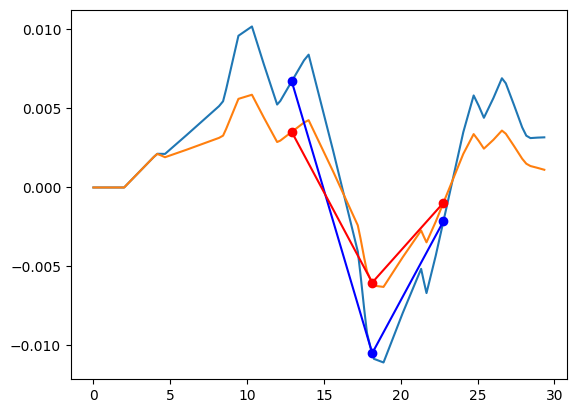

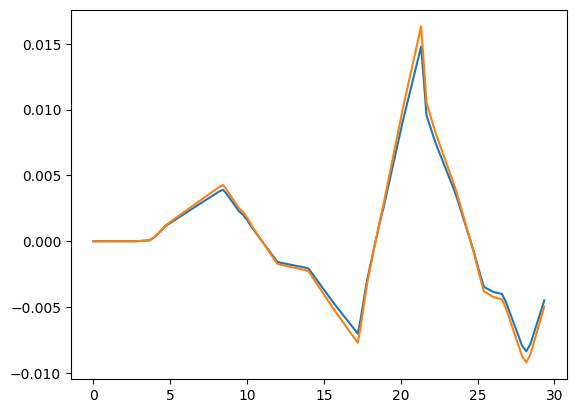

In [104]:
s = [0.0, 0.058, 1.058, 2.0, 2.758, 3.657, 3.9290000000000003, 4.16, 4.410000000000001, 4.660000000000001, 6.060000000000002, 7.360000000000002, 7.407000000000002, 7.454000000000002, 7.501000000000002, 7.548000000000003, 7.595000000000002, 7.642000000000003, 7.831000000000003, 8.020000000000003, 8.180000000000003, 8.440000000000003, 8.640000000000004, 8.740000000000004, 9.090000000000003, 9.440050000000003, 9.440100000000003, 9.586450000000003, 9.732800000000003, 9.879150000000003, 10.025500000000003, 10.171850000000003, 10.318200000000003, 10.318250000000003, 11.088300000000002, 11.958300000000001, 12.163300000000001, 12.318300000000002, 12.5233, 12.6783, 12.711633333335, 12.74496666667, 12.778300000005, 12.811633333340001, 12.844966666675, 12.878300000010002, 12.893300000010003, 12.908300000010003, 13.208300000010002, 13.508300000010003, 13.708300000010002, 14.008300000010003, 15.608300000010003, 17.208300000010006, 17.383300000010003, 17.50830000001, 17.63330000001, 17.80830000001, 18.02830000001, 18.148300000009996, 18.203300000009996, 18.258350000009997, 18.258400000009996, 18.362400000009995, 18.466400000009994, 18.570400000009993, 18.674400000009992, 18.77840000000999, 18.88240000000999, 18.882450000009992, 18.95745000000999, 19.03240000000999, 20.13095000000999, 21.32950000000999, 21.504500000009987, 21.679500000009988, 22.279500000009982, 22.779500000009982, 23.099500000009982, 23.419500000009982, 23.44450000000998, 23.588500000009983, 24.075000000009982, 24.748500000009983, 25.08200000000998, 25.41550000000998, 26.034000000009975, 26.587500000009975, 26.841000000009977, 27.372500000009975, 27.90600000000998, 28.17500000000998, 28.44400000000998, 28.90250000000998, 29.346500000009982]
x1 = [0.0, 0.0, 0.0, 0.0, 0.000758, 0.001657, 0.0019290000000000002, 0.0021323742447892004, 0.0021299961735931033, 0.0021237243285293825, 0.003312287634212303, 0.004439245607506668, 0.004480093789501514, 0.004520727832991614, 0.004561572284650833, 0.004602193161294683, 0.004643033833178186, 0.004683641289385987, 0.004847380608866477, 0.0050111199283469675, 0.005149735225261669, 0.0054567709453300205, 0.006216279971396298, 0.006639503237123773, 0.008120784667169924, 0.009602233257868234, 0.009602311515664382, 0.009700083840088799, 0.009797871819720543, 0.009895682162167534, 0.00999351476055391, 0.010091377177694419, 0.010189267271773291, 0.010189254498101524, 0.00781323299408683, 0.005249152707980528, 0.0054733481308004515, 0.005732316492213237, 0.006074823034726919, 0.006333791396139703, 0.006389462772918108, 0.006445092419427912, 0.006500679972345908, 0.00655622506862381, 0.00661172734549062, 0.006667186440454999, 0.00669213326291765, 0.0067170800853802995, 0.007216016534633286, 0.0077149529838862725, 0.008047577283388264, 0.008406571839779133, 0.002304399061845673, -0.004052143837647357, -0.005498306971499953, -0.006633899539379547, -0.007769492107259155, -0.009221008819680947, -0.010092482481559917, -0.010485178430997964, -0.010665164074490403, -0.010845277639542331, -0.01084533415711314, -0.01088345283639644, -0.010921597139272453, -0.01095977351523605, -0.010997975655895465, -0.011036209321836474, -0.011074468096615274, -0.011074452266099431, -0.01088668927601632, -0.010699015029295593, -0.00794825393876782, -0.00514922922752154, -0.005934748590526321, -0.006682703115147611, -0.0043206375177695325, -0.0021428504493725574, -0.0007490667255984874, 0.0006447169981755826, 0.0007536063515954333, 0.0013829131519454917, 0.0035022480400672042, 0.0058239295439305935, 0.005162366071202893, 0.004410885739526063, 0.005658492897855958, 0.006912522439819461, 0.006592503728431725, 0.005225369428639288, 0.0038068087570759025, 0.003276970809432267, 0.003126383921187662, 0.0031558786415855395, 0.0031734578537433713]
y1 = [0.0, 0.0, 0.0, 0.0, 0.0, 7.049999999999999e-05, 0.0002720000000000002, 0.0005087832702294874, 0.0008186076449839217, 0.0011240119908835196, 0.0021883421773901605, 0.003163868998735015, 0.0031991386275081394, 0.0032344082857570884, 0.0032696779734892483, 0.0033049476906911587, 0.0033402174373703517, 0.0033754872135131103, 0.003517314509402384, 0.003659141805291658, 0.0037792072409651174, 0.003914260142366785, 0.0036455038165454073, 0.0034815592449936967, 0.0029077532445627133, 0.0023338760762318294, 0.0023338265166977486, 0.0021601364654219124, 0.002033731807203296, 0.001787423913736501, 0.00159818483767485, 0.0012930138946744792, 0.0010568450182475474, 0.0010567500110089255, -0.00018044048053471166, -0.0015452543273837879, -0.001627599346143902, -0.0016628269115460889, -0.0017094182077231745, -0.001744645773125361, -0.001752227299129561, -0.0017598202691311731, -0.0017674247327207552, -0.0017750407395639308, -0.001782668339401714, -0.001790307582050834, -0.0017937478683563736, -0.0017971881546619132, -0.0018659938807727007, -0.0019347996068834882, -0.0019806700909573466, -0.0020834089203528405, -0.00464485462657121, -0.007017624758210533, -0.005975744056763254, -0.0050796647882041255, -0.004183585519644984, -0.002983193816431019, -0.0017830246361890422, -0.0011508316979107615, -0.0008610766011998823, -0.0005710599712333798, -0.0005708021977712646, 1.532515896795095e-05, 0.0004954037830189681, 0.0010776533295579985, 0.0015431634337402652, 0.002103251518199261, 0.0025361936456812454, 0.002536430997469063, 0.0029300251872296677, 0.003323365325630992, 0.009088592931245105, 0.014792332823050815, 0.012250540179176614, 0.00955198325231691, 0.007433850393685899, 0.005956322792390278, 0.005010705127561077, 0.004065087462731876, 0.003991211082667093, 0.0035408456510433563, 0.0017571992232724098, -0.0007338388142786678, -0.00216388628808091, -0.003463486828671762, -0.0038515559327296617, -0.004001286421418521, -0.004592504371249373, -0.006265651925204614, -0.00794470343265796, -0.008358934143784547, -0.007800557146057552, -0.006121260673901768, -0.0044950505267172345]
x2 = [0.0, 0.0, 0.0, 0.0, 0.000758, 0.001657, 0.0019290000000000002, 0.0021219620086319886, 0.002026167539491949, 0.0019141868675335498, 0.002388540796129878, 0.002849702454195835, 0.002866495807061789, 0.00288303902643179, 0.00289983257585117, 0.0029163647005517952, 0.002933158509819165, 0.002949679352591597, 0.0030166596746626505, 0.003083639996733704, 0.0031403429148890933, 0.003281841650639273, 0.0037054683589206657, 0.0039433407412160885, 0.004775894079250062, 0.005608540390217244, 0.005608581436140835, 0.005652020557830473, 0.005695465555171392, 0.0057389173420018015, 0.0057823784443678805, 0.005825850258231235, 0.005869334323499646, 0.005869322603401759, 0.004433481398786951, 0.002877495080900761, 0.0029651505746549154, 0.003080271439062877, 0.0032325280661830835, 0.0033476489305910443, 0.0033723951468575294, 0.003397119337648586, 0.003421821341487863, 0.0034465009970439183, 0.0034711581431312657, 0.003495792618711432, 0.0035068730077187004, 0.003517953396725969, 0.0037395611768713264, 0.003961168957016684, 0.004108907477113589, 0.004259491786948668, 0.0010011094370733923, -0.0023964136148748897, -0.0032125199951160434, -0.0038558085616287956, -0.004499097128141557, -0.005319803871145275, -0.005801601391049303, -0.006016770868196165, -0.006115390211888477, -0.006214078753289724, -0.006214107038260072, -0.0062271329972178316, -0.006240169118308657, -0.006253219146910269, -0.006266279685077395, -0.006279354047188881, -0.006292438904767141, -0.00629242588843677, -0.006179707977368914, -0.006067044511198019, -0.004415724287555097, -0.0027213711131868676, -0.003105506539227202, -0.003471242762056536, -0.0021670144546909256, -0.0009716676244027004, -0.00020664565301823268, 0.000558376318366235, 0.0006181436598806473, 0.0009637520066939667, 0.002127044536818275, 0.0033786461592715785, 0.0029459471641344525, 0.002456930368489796, 0.0030172152146415864, 0.0036018080540240315, 0.003402630632600709, 0.002626871642989038, 0.001819891582413861, 0.0015045108937400712, 0.001357958104147915, 0.001241606516596789, 0.0011211661908661933]
y2 = [0.0, 0.0, 0.0, 0.0, 0.0, 7.049999999999999e-05, 0.0002720000000000002, 0.0005109760410554866, 0.0008438530586681492, 0.0011748515944550613, 0.0023531245195635175, 0.0034338431998659864, 0.0034729164531100685, 0.0035119897197157944, 0.003551062999681563, 0.003590136293004658, 0.0036292095996834483, 0.0036682829197151974, 0.0038254031069317384, 0.0039825232941482795, 0.004115535092850114, 0.004266239602117788, 0.003976017236648221, 0.0037986740076716864, 0.0031779727062538187, 0.0025571945714287047, 0.002557141413998231, 0.002401038949620127, 0.002232508114985779, 0.0019970603077236666, 0.001756945400396294, 0.0014571183338969213, 0.0011627231373936837, 0.001162618888133327, -0.00019426490208853384, -0.0016912004527137388, -0.0017820853192765719, -0.0018212123412346172, -0.0018729609831791285, -0.0019120880051371738, -0.00192050867165416, -0.0019289418812334983, -0.001937387688953448, -0.001945846149974547, -0.0019543173195399753, -0.001962801252975911, -0.001966621903201053, -0.0019704425534261953, -0.002046855557929032, -0.002123268562431869, -0.0021742105654337603, -0.0022878839013603497, -0.005105274810833628, -0.0077151949185944165, -0.006569891260761186, -0.0055848400616279135, -0.0045997888624946266, -0.003280222903371705, -0.001960991055538109, -0.0012660907463513083, -0.0009475947713073576, -0.0006288113251074397, -0.000628527993973287, -2.4686656652353803e-05, 0.0005448043973680523, 0.001144451268780985, 0.0016993319289392078, 0.002274646980534465, 0.0027950866138794946, 0.0027953484624441208, 0.0032295225865378156, 0.003663416457812458, 0.010023044373606484, 0.01631494620708764, 0.01351167719268686, 0.010535515026765656, 0.008200169169873987, 0.006571245120869066, 0.0055287337295059115, 0.0044862223381427575, 0.00440477613569251, 0.003907963007662932, 0.0019428415908171897, -0.0008023286497258614, -0.002376209434618127, -0.003806551249402432, -0.004236673351546441, -0.0044046375547825214, -0.005056717227707439, -0.006900250131020276, -0.008750475348868187, -0.009207658783623488, -0.008593836525140907, -0.006746410232352594, -0.004957425956580667]
bpm_s = [12.908300000010003, 18.148300000009996, 22.779500000009982]
bpm_x1 = [0.0067170800853802995, -0.010485178430997964, -0.0021428504493725574]
bpm_y1 = [-0.0017971881546619132, -0.0011508316979107615, 0.005956322792390278]
bpm_x2 = [0.003517953396725969, -0.006016770868196165, -0.0009716676244027004]
bpm_y2 = [-0.0019704425534261953, -0.0012660907463513083, 0.006571245120869066]

plt.plot(s, x1)
plt.plot(s, x2)
# plt.scatter(bpm_s, len(bpm_s)*[0])
plt.plot(bpm_s, bpm_x1, 'bo-')
plt.plot(bpm_s, bpm_x2, 'ro-')
plt.show()

plt.plot(s, y1)
plt.plot(s, y2)
plt.show()

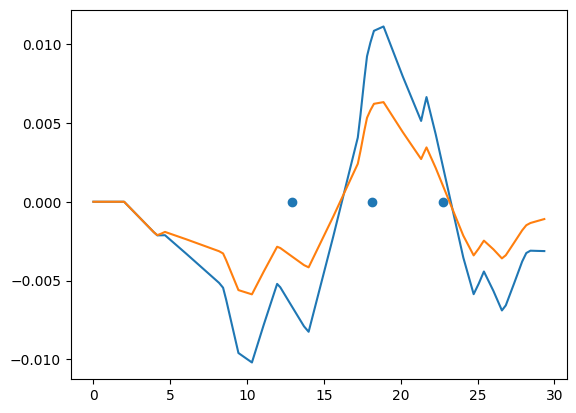

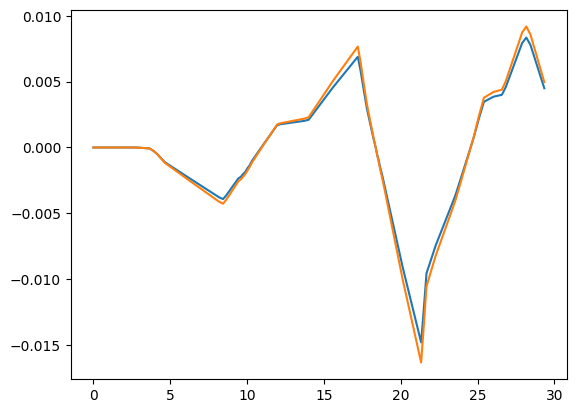

In [101]:
x1=[0.0, 0.0, 0.0, 0.0, -0.000758, -0.001657, -0.0019290000000000002, -0.0021323742447892004, -0.0021299961735931033, -0.0021237243285293825, -0.003312287634212303, -0.004439245607506668, -0.004479881016463625, -0.004520722234577841, -0.0045613446395865575, -0.004602182138453033, -0.0046427912860440585, -0.004683625016327781, -0.004847365777752032, -0.005011106539176283, -0.005149723056784115, -0.005456760595994428, -0.006216270026693005, -0.0066394934169780795, -0.008120775282975829, -0.009602224309729438, -0.009602302567712136, -0.009702429758224903, -0.009802537803823263, -0.00990264276885569, -0.010002722614037965, -0.010102796209889704, -0.010202840201591856, -0.010202826184731959, -0.007804755664398442, -0.0052150539885120195, -0.005427885813016996, -0.005677626889706683, -0.0060079296040382035, -0.00625767068072789, -0.006311357945936458, -0.0063650039909874485, -0.0064186084655127726, -0.006472171019415842, -0.0065256913028738555, -0.006579168966340084, -0.006603224272999789, -0.006627279579659493, -0.0071083857128535636, -0.007589491846047634, -0.007910229268177015, -0.008253902104740878, -0.002215747230284405, 0.0040750408636684565, 0.005518371822674333, 0.006652427726217306, 0.007786483629760293, 0.009235601595313994, 0.010102558389201724, 0.010492675349960854, 0.010671478956975455, 0.01085040939407509, 0.010850464786384599, 0.010896497039703232, 0.010942505041965572, 0.010988514971526041, 0.011034501291059463, 0.011080490575276616, 0.011126457450761922, 0.011126440697130693, 0.010936523066602127, 0.01074669544483684, 0.007964372110743996, 0.005130263908445674, 0.005906344583857638, 0.006645305629373756, 0.004280146674644205, 0.0021010126742821425, 0.0007063669140504156, -0.0006882788461813113, -0.0007972355461994164, -0.0014227104765789412, -0.0035426313394902316, -0.005866813159934247, -0.005192887023493021, -0.004427745596106171, -0.0056594954516242905, -0.006899962549405807, -0.006577784319928838, -0.005204603713551036, -0.0037940086201068974, -0.003255241156601263, -0.003106488151008804, -0.003120302009793954, -0.003131159731932942]
y1=[0.0, 0.0, 0.0, 0.0, 0.0, -7.049999999999999e-05, -0.0002720000000000002, -0.0005087832702294874, -0.0008186076449839217, -0.0011240119908835196, -0.0021883421773901605, -0.003163868998735015, -0.0031991374631975956, -0.0032344058981843516, -0.0032696743037087207, -0.0033049426797633515, -0.0033402110263619405, -0.0033754793434969876, -0.003517305231045163, -0.0036591311185933386, -0.003779195362020366, -0.0039142465298538775, -0.003645490165292222, -0.0034815456796995652, -0.00290773998012527, -0.0023338631126340417, -0.0023338135529629035, -0.0022413356572236476, -0.0020262469478732927, -0.0018616159530805783, -0.0015774074239792955, -0.0013548781753354327, -0.001017907337494948, -0.0010178095050344341, 0.00027122106223662914, 0.001691358889757068, 0.0017640202122278757, 0.001789467569114494, 0.001823123750803247, 0.001848571107689865, 0.0018540497001301392, 0.0018595404015816018, 0.001865043247904654, 0.0018705582750390161, 0.0018760855190039626, 0.0018816250158985575, 0.0018841205518340285, 0.0018866160877694998, 0.0019365268064789212, 0.0019864375251883427, 0.0020197113376612904, 0.0021039613114518557, 0.004586353155770349, 0.006884571876018939, 0.005859175883800265, 0.004977779538422052, 0.004096383193043825, 0.002915364549473537, 0.0017325144840467954, 0.0011092321049558684, 0.000823561014539193, 0.0005376319935491131, 0.0005373776026832367, 6.258891266660356e-05, -0.0005187226610651034, -0.0009888961121449255, -0.00155831371979795, -0.002005827825546566, -0.0025456479592926807, -0.0025458849565316117, -0.002939087339343024, -0.0033320359631002585, -0.009091525097570078, -0.014789120435053638, -0.01224715404643419, -0.009548423724819396, -0.007426997010488174, -0.0059466033397583915, -0.004999151390491326, -0.004051699441224262, -0.0039776797576877715, -0.0035286602895025576, -0.0017525739362048752, 0.0007363927554285987, 0.002166272579279265, 0.0034657067485608425, 0.003852230893549501, 0.004000405718528257, 0.004590220406868281, 0.006256373011509491, 0.00792918826643376, 0.008343045487864598, 0.007787329462082735, 0.00611483285161498, 0.004495247920763542]
x2=[0.0, 0.0, 0.0, 0.0, -0.000758, -0.001657, -0.0019290000000000002, -0.0021219620086319886, -0.002026167539491949, -0.0019141868675335498, -0.002388540796129878, -0.002849702454195835, -0.0028662519823063194, -0.002883046314651299, -0.0028995849570109815, -0.002916379632188318, -0.0029329072015799574, -0.002949702282900784, -0.0030166835036022025, -0.0030836647243036204, -0.003140368403204292, -0.0032818687813476175, -0.0037054993548551896, -0.003943373886113447, -0.004775934745517346, -0.005608588578705857, -0.005608629625034697, -0.005653480548752969, -0.005698321768308159, -0.005743156397085778, -0.005787978672180227, -0.005832792969614025, -0.0058775930495740415, -0.005877580549262999, -0.004427957095656453, -0.002855950449251737, -0.0029364654512637365, -0.0030457862230941334, -0.0031903717600311092, -0.0032996925318615053, -0.00332319157435276, -0.0033466689127224095, -0.0033701243936374316, -0.0033935578639075585, -0.0034169691704862746, -0.0034403581604718187, -0.0034508781618124347, -0.0034613981631530506, -0.0036717981899653633, -0.0038821982167776764, -0.004022464901319219, -0.004163420108512671, -0.0009453893542971797, 0.002410685009154962, 0.003224975847326509, 0.003867270285579617, 0.004509564723832734, 0.005328727916837798, 0.0058076669903719845, 0.006021207093629816, 0.006119079640956323, 0.006217020697399754, 0.0062170482744086895, 0.006235079755099217, 0.006253101870209102, 0.0062711248315148495, 0.006289139002176574, 0.006307154537031427, 0.0063251620459489994, 0.006325148471420144, 0.006211108629325391, 0.006097124005767591, 0.004426439439931401, 0.002710594191410365, 0.0030891417570523033, 0.0034495536255462426, 0.002143163256642794, 0.0009467298962878598, 0.00018101254566069852, -0.0005847048049664628, -0.0006445264729842105, -0.0009877371674572933, -0.002151609000306125, -0.0034052465755145347, -0.0029651280568321905, -0.0024679074760825385, -0.0030191884048109898, -0.003595625803513388, -0.0033955224928233748, -0.0026123582498238087, -0.0018150668101793149, -0.0014901088454417873, -0.0013489530416613913, -0.001220566385977755, -0.0010986917793900616]
y2=[0.0, 0.0, 0.0, 0.0, 0.0, -7.049999999999999e-05, -0.0002720000000000002, -0.0005109760410554866, -0.0008438530586681492, -0.0011748515944550613, -0.0023531245195635175, -0.0034338431998659864, -0.0034729142204283905, -0.0035119852276291512, -0.0035510562214709526, -0.003590127201955387, -0.0036291981690851566, -0.003668269122861884, -0.0038253886749938294, -0.003982508227125775, -0.004115519488189856, -0.004266223372536279, -0.003976002071378004, -0.0037986594972762825, -0.0031779604879202607, -0.002557184645438478, -0.00255713148819759, -0.002428282069999505, -0.0022292207915328398, -0.0020207398089207014, -0.001748151403664843, -0.001475327542891843, -0.0011468471857883117, -0.0011467419464326807, 0.00022878615072815796, 0.001745577073737584, 0.0018326837530090478, 0.0018680401162600108, 0.0019148017579790257, 0.0019501581212299883, 0.0019577680168387976, 0.001965390698855015, 0.001973026217063251, 0.0019806746213319507, 0.001988335961613719, 0.0019960102879456472, 0.0019994666641712264, 0.002002923040396806, 0.0020720505649083894, 0.002141178089419973, 0.0021872631057610285, 0.0022937741870605217, 0.005078540806648123, 0.007657735047123347, 0.006519712951480336, 0.005541117347368356, 0.004562521743256361, 0.0032514905176618683, 0.0019400082894124255, 0.0012491089725241652, 0.0009324467856170456, 0.0006154987508063359, 0.0006152169552760941, 4.8439117389696e-05, -0.0005533440406648433, -0.001115409464119001, -0.0017028349170993707, -0.002240230378374008, -0.0027937107846589975, -0.0027939727004905653, -0.003228227349540837, -0.0036622016875629743, -0.010023009012902834, -0.01631615158733066, -0.013512790239162067, -0.01053652829457341, -0.008201603579441632, -0.006573063206433851, -0.0055307973677088665, -0.0044885315289838815, -0.004407104510333491, -0.003913255001646405, -0.001954670977241135, 0.0007862611125164515, 0.0023529249352426105, 0.0037767737432602435, 0.0042119600169543015, 0.004386509250473629, 0.005038842131642379, 0.00687887510507589, 0.008726077976487783, 0.009184124419283676, 0.008574499897769743, 0.0067365631827211525, 0.004956732598871654]
plt.plot(s, x1)
plt.plot(s, x2)
plt.scatter(bpm_s, len(bpm_s)*[0])
plt.show()

plt.plot(s, y1)
plt.plot(s, y2)
plt.show()


In [ ]:
# X-focusing lenses from measurements: l21 l23(model_grad < 0) l25(U < 0) l28 l29(model_grad <0) l30
# Y-focusing lenses from measurements: l22 l24 l26(model_grad > 0) l27 l29